In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder, StandardScaler, RobustScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, classification_report, confusion_matrix
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from imblearn.over_sampling import SMOTE
import warnings
warnings.filterwarnings('ignore')

print("✅ All libraries imported successfully!")

✅ All libraries imported successfully!


In [3]:
from google.colab import files
import pandas as pd

# Upload TRAIN CSV file
print("Upload TRAIN CSV file:")
uploaded = files.upload()
train_file = list(uploaded.keys())[0]
train_df = pd.read_csv(train_file)

print(f"\nTrain file loaded: {train_file}")
print(f"Shape: {train_df.shape}")
print(f"Columns: {list(train_df.columns)}")
print("\nFirst 5 rows:")
print(train_df.head())

Upload TRAIN CSV file:


Saving Heart_Attack_training_dataset.csv to Heart_Attack_training_dataset.csv

Train file loaded: Heart_Attack_training_dataset.csv
Shape: (7963, 26)
Columns: ['patient_id', 'age', 'sex', 'chol', 'bp', 'hr', 'diabetes', 'family_history', 'smoking', 'obesity', 'alcohol', 'exercise_hr_wk', 'diet', 'prev_heart_prob', 'med_use', 'stress_lvl', 'sedentary_hr', 'income', 'bmi', 'triglycerides', 'phys_act_days', 'sleep_hr', 'country', 'continent', 'hemisphere', 'heart_attack_risk']

First 5 rows:
  patient_id  age     sex  chol       bp  hr  diabetes  family_history  \
0    BMW7812   67    Male   208   158/88  72         0               0   
1    CZE1114   21    Male   389   165/93  98         1               1   
2    BNI9906   21  Female   324   174/99  72         1               0   
3    JLN3497   84    Male   383  163/100  73         1               1   
4    GFO8847   66    Male   318    91/88  93         1               1   

   smoking  obesity  ...  sedentary_hr  income        bmi  tr

In [4]:
# Upload TEST CSV file
print("Upload TEST CSV file:")
uploaded = files.upload()
test_file = list(uploaded.keys())[0]
test_df = pd.read_csv(test_file)

print(f"\nTest file loaded: {test_file}")
print(f"Shape: {test_df.shape}")
print(f"Columns: {list(test_df.columns)}")
print("\nFirst 5 rows:")
print(test_df.head())

Upload TEST CSV file:


Saving Hear_Attack_evaluation_dataset.csv to Hear_Attack_evaluation_dataset.csv

Test file loaded: Hear_Attack_evaluation_dataset.csv
Shape: (800, 25)
Columns: ['patient_id', 'age', 'sex', 'chol', 'bp', 'hr', 'diabetes', 'family_history', 'smoking', 'obesity', 'alcohol', 'exercise_hr_wk', 'diet', 'prev_heart_prob', 'med_use', 'stress_lvl', 'sedentary_hr', 'income', 'bmi', 'triglycerides', 'phys_act_days', 'sleep_hr', 'country', 'continent', 'hemisphere']

First 5 rows:
  patient_id  age     sex  chol       bp   hr  diabetes  family_history  \
0    VRK5064   36    Male   164  118/103   46         1               1   
1    NEN2365   66    Male   355   158/89   49         0               0   
2    KXT2493   59  Female   370   172/81  104         0               0   
3    TKO0406   88    Male   296   178/67   53         1               0   
4    GDP2405   74    Male   294   130/67  105         1               1   

   smoking  obesity  ...  stress_lvl  sedentary_hr  income        bmi  \
0 

In [5]:
print("="*70)
print("FIRST 5 ROWS (head method)")
print("="*70)
print(train_df.head())

FIRST 5 ROWS (head method)
  patient_id  age     sex  chol       bp  hr  diabetes  family_history  \
0    BMW7812   67    Male   208   158/88  72         0               0   
1    CZE1114   21    Male   389   165/93  98         1               1   
2    BNI9906   21  Female   324   174/99  72         1               0   
3    JLN3497   84    Male   383  163/100  73         1               1   
4    GFO8847   66    Male   318    91/88  93         1               1   

   smoking  obesity  ...  sedentary_hr  income        bmi  triglycerides  \
0        1        0  ...      6.615001  261404  31.251233            286   
1        1        1  ...      4.963459  285768  27.194973            235   
2        0        0  ...      9.463426  235282  28.176571            587   
3        1        0  ...      7.648981  125640  36.464704            378   
4        1        1  ...      1.514821  160555  21.809144            231   

   phys_act_days  sleep_hr    country      continent           hemisphe

In [6]:
print("\n" + "="*70)
print("DATASET INFO (info method)")
print("="*70)
print(train_df.info())


DATASET INFO (info method)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7963 entries, 0 to 7962
Data columns (total 26 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   patient_id         7963 non-null   object 
 1   age                7963 non-null   int64  
 2   sex                7963 non-null   object 
 3   chol               7963 non-null   int64  
 4   bp                 7963 non-null   object 
 5   hr                 7963 non-null   int64  
 6   diabetes           7963 non-null   int64  
 7   family_history     7963 non-null   int64  
 8   smoking            7963 non-null   int64  
 9   obesity            7963 non-null   int64  
 10  alcohol            7963 non-null   int64  
 11  exercise_hr_wk     7963 non-null   float64
 12  diet               7963 non-null   object 
 13  prev_heart_prob    7963 non-null   int64  
 14  med_use            7963 non-null   int64  
 15  stress_lvl         7963 non-null   int64  
 

In [7]:
len(train_df)

7963

In [8]:
print("\nColumns:")
for col in train_df.columns:
    dtype = train_df[col].dtype
    if dtype == 'object':
        print(f"  {col}: CATEGORICAL")
    else:
        print(f"  {col}: NUMERICAL")


Columns:
  patient_id: CATEGORICAL
  age: NUMERICAL
  sex: CATEGORICAL
  chol: NUMERICAL
  bp: CATEGORICAL
  hr: NUMERICAL
  diabetes: NUMERICAL
  family_history: NUMERICAL
  smoking: NUMERICAL
  obesity: NUMERICAL
  alcohol: NUMERICAL
  exercise_hr_wk: NUMERICAL
  diet: CATEGORICAL
  prev_heart_prob: NUMERICAL
  med_use: NUMERICAL
  stress_lvl: NUMERICAL
  sedentary_hr: NUMERICAL
  income: NUMERICAL
  bmi: NUMERICAL
  triglycerides: NUMERICAL
  phys_act_days: NUMERICAL
  sleep_hr: NUMERICAL
  country: CATEGORICAL
  continent: CATEGORICAL
  hemisphere: CATEGORICAL
  heart_attack_risk: NUMERICAL


In [9]:
train_df.describe()

,age,chol,hr,diabetes,family_history,smoking,obesity,alcohol,exercise_hr_wk,prev_heart_prob,med_use,stress_lvl,sedentary_hr,income,bmi,triglycerides,phys_act_days,sleep_hr,heart_attack_risk
count,7963.000000,7963.000000,7963.000000,7963.000000,7963.000000,7963.000000,7963.000000,7963.000000,7963.000000,7963.000000,7963.000000,7963.000000,7963.000000,7963.000000,7963.000000,7963.000000,7963.000000,7963.000000,7963.000000
mean,53.685922,259.574658,75.102474,0.653020,0.489640,0.896521,0.504207,0.597890,9.999996,0.495165,0.498179,5.472812,5.976430,158283.114279,28.891190,418.370715,3.486877,7.022353,0.343966
std,21.237794,80.824235,20.583831,0.476039,0.499924,0.304602,0.500014,0.490355,5.778830,0.500008,0.500028,2.858878,3.465806,80715.248604,6.318153,223.794036,2.278560,1.987275,0.475060
min,18.000000,120.000000,40.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.002442,0.000000,0.000000,1.000000,0.001263,20062.000000,18.002337,30.000000,0.000000,4.000000,0.000000
25%,35.000000,191.000000,57.000000,0.000000,0.000000,1.000000,0.000000,0.000000,4.979003,0.000000,0.000000,3.000000,2.978895,87835.000000,23.420212,227.500000,2.000000,5.000000,0.000000
50%,54.000000,259.000000,75.000000,1.000000,0.000000,1.000000,1.000000,1.000000,10.062622,0.000000,0.000000,5.000000,5.904138,157830.000000,28.779074,419.000000,3.000000,7.000000,0.000000
75%,72.000000,329.000000,93.000000,1.000000,1.000000,1.000000,1.000000,1.000000,15.038864,1.000000,1.000000,8.000000,8.995663,228486.500000,34.320578,614.000000,5.000000,9.000000,1.000000
max,90.000000,400.000000,110.000000,1.000000,1.000000,1.000000,1.000000,1.000000,19.998709,1.000000,1.000000,10.000000,11.999313,299954.000000,39.997211,800.000000,7.000000,10.000000,1.000000


In [11]:
print("="*70)
print("NUMERICAL DATA - DESCRIBE METHOD")
print("="*70)
print(train_df.describe())

print("\nChecking for missing values from count:")
numerical_cols = train_df.select_dtypes(include=['int64', 'float64']).columns
for col in numerical_cols:
    count = train_df[col].count()
    total = len(train_df)
    if count < total:
        print(f"  {col}: {total - count} missing values")

NUMERICAL DATA - DESCRIBE METHOD
               age         chol           hr     diabetes  family_history  \
count  7963.000000  7963.000000  7963.000000  7963.000000     7963.000000   
mean     53.685922   259.574658    75.102474     0.653020        0.489640   
std      21.237794    80.824235    20.583831     0.476039        0.499924   
min      18.000000   120.000000    40.000000     0.000000        0.000000   
25%      35.000000   191.000000    57.000000     0.000000        0.000000   
50%      54.000000   259.000000    75.000000     1.000000        0.000000   
75%      72.000000   329.000000    93.000000     1.000000        1.000000   
max      90.000000   400.000000   110.000000     1.000000        1.000000   

           smoking      obesity      alcohol  exercise_hr_wk  prev_heart_prob  \
count  7963.000000  7963.000000  7963.000000     7963.000000      7963.000000   
mean      0.896521     0.504207     0.597890        9.999996         0.495165   
std       0.304602     0.50001

BOXPLOTS - CHECKING FOR OUTLIERS


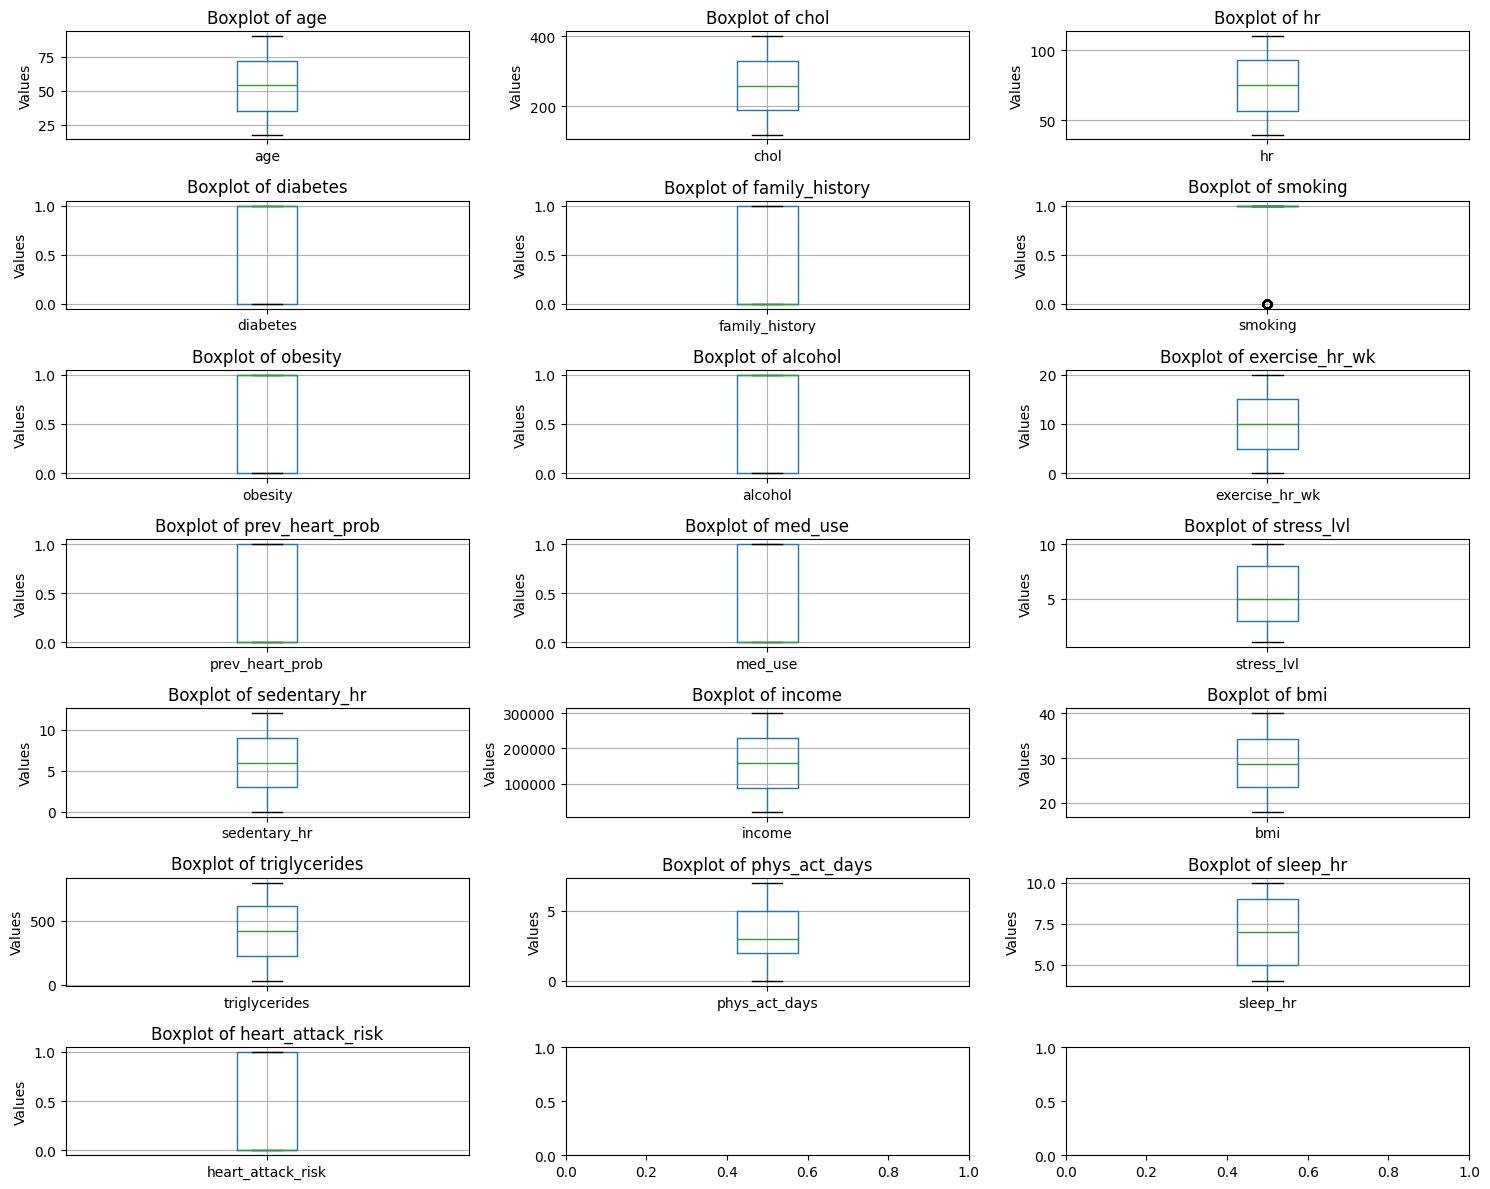

In [15]:

print("BOXPLOTS - CHECKING FOR OUTLIERS")


numerical_cols = train_df.select_dtypes(include=['int64', 'float64']).columns
# Remove patient_id if present
numerical_cols = [col for col in numerical_cols if col != 'patient_id']

fig, axes = plt.subplots(nrows=(len(numerical_cols)//3)+1, ncols=3, figsize=(15, 12))
axes = axes.flatten()

for idx, col in enumerate(numerical_cols):
    train_df.boxplot(column=col, ax=axes[idx])
    axes[idx].set_title(f'Boxplot of {col}')
    axes[idx].set_ylabel('Values')

plt.tight_layout()
plt.show()




CATEGORICAL DATA ANALYSIS

patient_id:
  Unique values: 7963
  Distribution:
patient_id
ZWN9666    1
BMW7812    1
CZE1114    1
BNI9906    1
JLN3497    1
          ..
COP0566    1
DXB2434    1
DCY3282    1
VTW9069    1
YYU9565    1
Name: count, Length: 7963, dtype: int64
--------------------------------------------------

sex:
  Unique values: 2
  Distribution:
sex
Male      5548
Female    2415
Name: count, dtype: int64
--------------------------------------------------

bp:
  Unique values: 3786
  Distribution:
bp
101/93     8
129/106    7
146/94     7
140/95     7
106/64     7
          ..
138/109    1
103/68     1
174/106    1
175/99     1
133/108    1
Name: count, Length: 3786, dtype: int64
--------------------------------------------------

diet:
  Unique values: 3
  Distribution:
diet
Healthy      2702
Average      2644
Unhealthy    2617
Name: count, dtype: int64
--------------------------------------------------

country:
  Unique values: 20
  Distribution:
country
Germany       

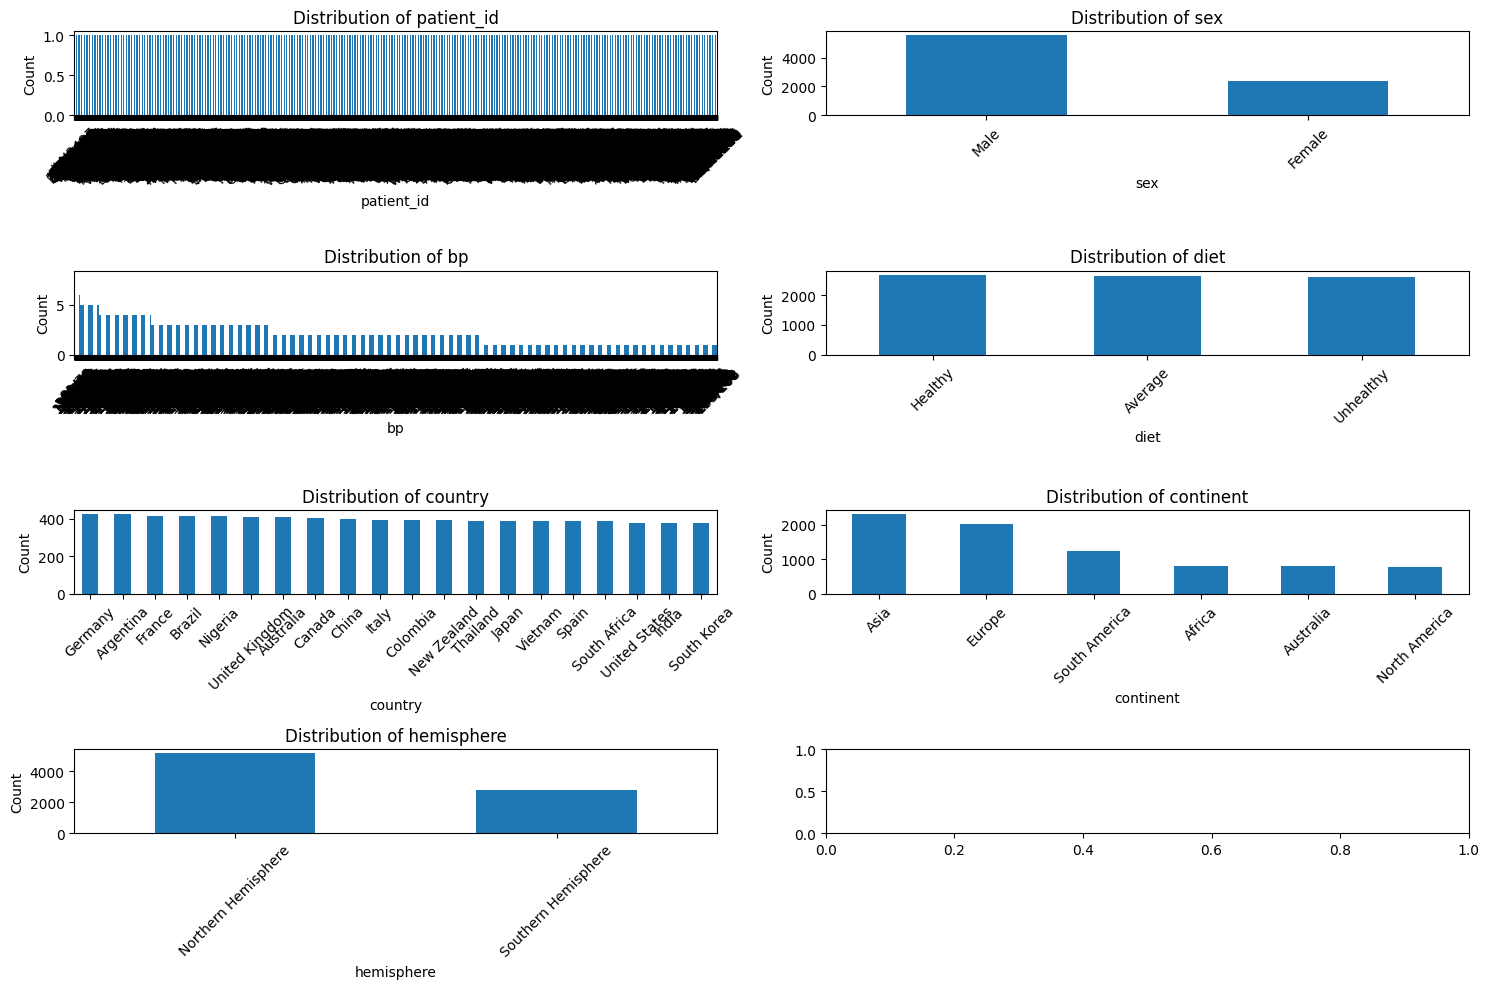


Check if distributions are symmetrical (balanced)


In [18]:
print("="*70)
print("CATEGORICAL DATA ANALYSIS")
print("="*70)

categorical_cols = train_df.select_dtypes(include=['object']).columns

for col in categorical_cols:
    print(f"\n{col}:")
    print(f"  Unique values: {train_df[col].nunique()}")
    print(f"  Distribution:\n{train_df[col].value_counts()}")
    print("-"*50)

# Visualize distribution
if len(categorical_cols) > 0:
    fig, axes = plt.subplots(nrows=(len(categorical_cols)//2)+1, ncols=2, figsize=(15, 10))
    axes = axes.flatten()

    for idx, col in enumerate(categorical_cols):
        train_df[col].value_counts().plot(kind='bar', ax=axes[idx])
        axes[idx].set_title(f'Distribution of {col}')
        axes[idx].set_xlabel(col)
        axes[idx].set_ylabel('Count')
        axes[idx].tick_params(axis='x', rotation=45)

    plt.tight_layout()
    plt.show()

    print("\nCheck if distributions are symmetrical (balanced)")



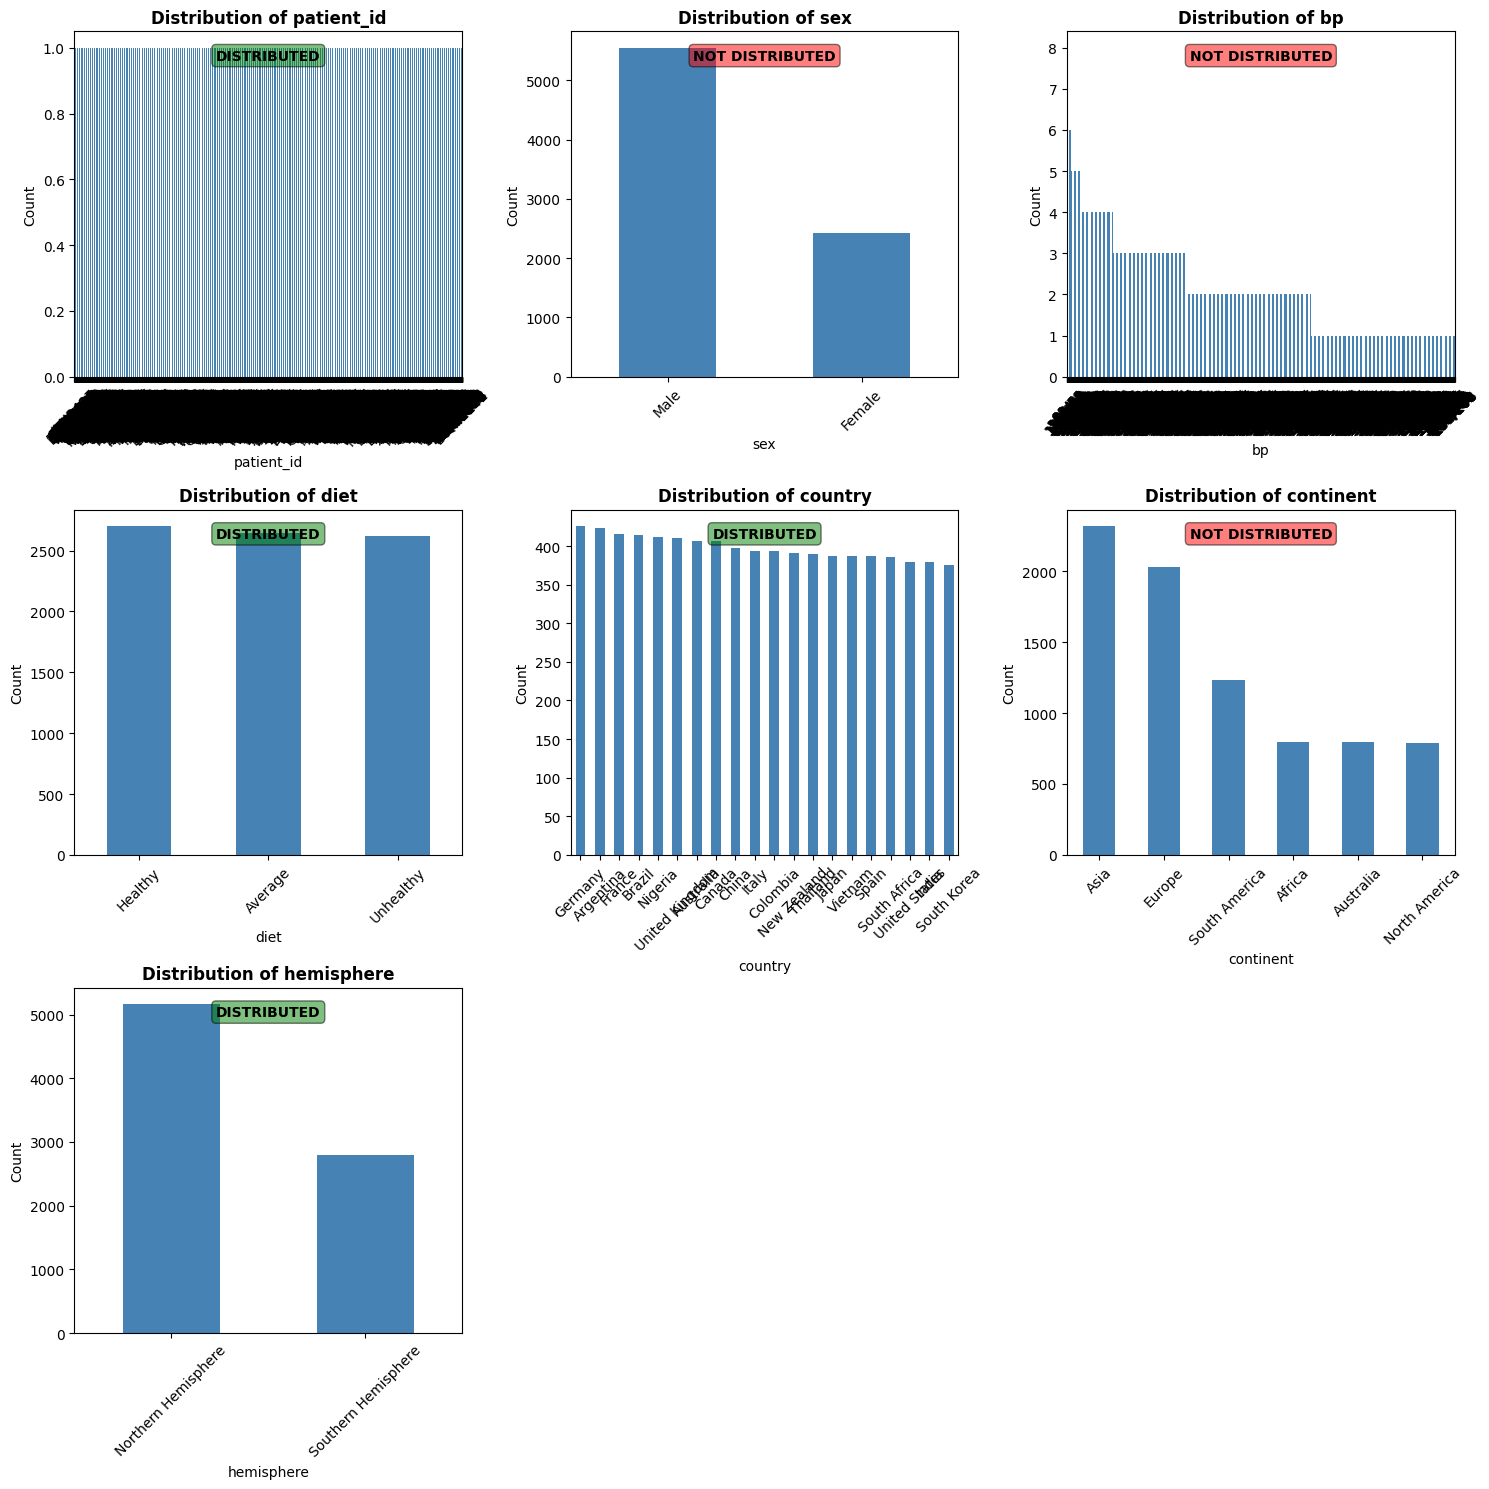


DISTRIBUTION SUMMARY:

patient_id:
patient_id
ZWN9666    1
BMW7812    1
CZE1114    1
BNI9906    1
JLN3497    1
          ..
COP0566    1
DXB2434    1
DCY3282    1
VTW9069    1
YYU9565    1
Name: count, Length: 7963, dtype: int64
  Status: DISTRIBUTED (balanced)

sex:
sex
Male      5548
Female    2415
Name: count, dtype: int64
  Status: NOT DISTRIBUTED (imbalanced)

bp:
bp
101/93     8
129/106    7
146/94     7
140/95     7
106/64     7
          ..
138/109    1
103/68     1
174/106    1
175/99     1
133/108    1
Name: count, Length: 3786, dtype: int64
  Status: NOT DISTRIBUTED (imbalanced)

diet:
diet
Healthy      2702
Average      2644
Unhealthy    2617
Name: count, dtype: int64
  Status: DISTRIBUTED (balanced)

country:
country
Germany           426
Argentina         424
France            416
Brazil            414
Nigeria           412
United Kingdom    410
Australia         407
Canada            406
China             398
Italy             393
Colombia          393
New Zealand      

In [19]:
import matplotlib.pyplot as plt



# Get categorical columns
categorical_cols = train_df.select_dtypes(include=['object']).columns.tolist()

if len(categorical_cols) == 0:
    print("No categorical columns found (all may already be encoded)")
else:
    # Create histograms for each categorical column
    num_cols_plot = len(categorical_cols)
    num_rows = (num_cols_plot // 3) + 1

    fig, axes = plt.subplots(nrows=num_rows, ncols=3, figsize=(15, 5*num_rows))
    axes = axes.flatten()

    for idx, col in enumerate(categorical_cols):
        # Count values
        value_counts = train_df[col].value_counts()

        # Plot
        value_counts.plot(kind='bar', ax=axes[idx], color='steelblue')
        axes[idx].set_title(f'Distribution of {col}', fontweight='bold')
        axes[idx].set_xlabel(col)
        axes[idx].set_ylabel('Count')
        axes[idx].tick_params(axis='x', rotation=45)


        max_count = value_counts.max()
        min_count = value_counts.min()

        if max_count > 2 * min_count:
            axes[idx].text(0.5, 0.95, 'NOT DISTRIBUTED',
                          transform=axes[idx].transAxes,
                          ha='center', va='top',
                          bbox=dict(boxstyle='round', facecolor='red', alpha=0.5),
                          fontsize=10, fontweight='bold')
        else:
            axes[idx].text(0.5, 0.95, 'DISTRIBUTED',
                          transform=axes[idx].transAxes,
                          ha='center', va='top',
                          bbox=dict(boxstyle='round', facecolor='green', alpha=0.5),
                          fontsize=10, fontweight='bold')

    # Hide extra subplots
    for idx in range(len(categorical_cols), len(axes)):
        axes[idx].axis('off')

    plt.tight_layout()
    plt.show()

    # Print summary
    print("\nDISTRIBUTION SUMMARY:")
    for col in categorical_cols:
        value_counts = train_df[col].value_counts()
        print(f"\n{col}:")
        print(value_counts)

        # Check symmetry
        if value_counts.max() > 2 * value_counts.min():
            print(f"  Status: NOT DISTRIBUTED (imbalanced)")
        else:
            print(f"  Status: DISTRIBUTED (balanced)")

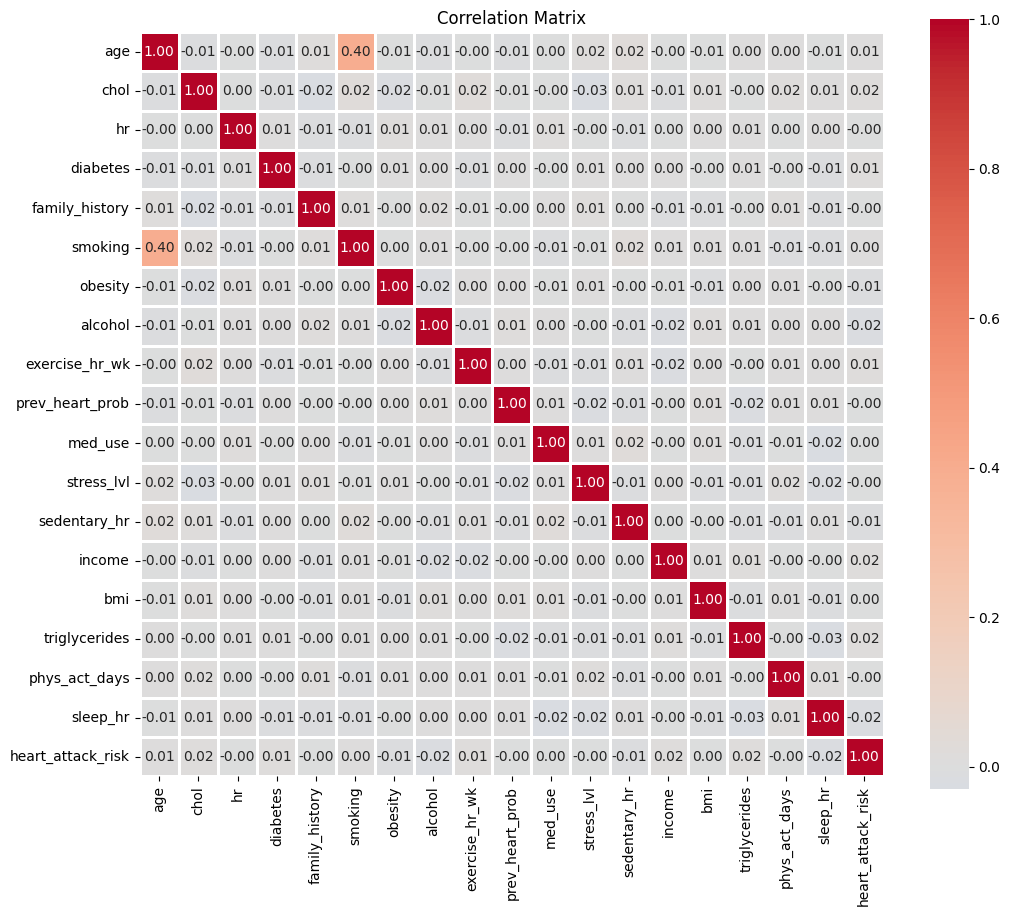


No highly correlated features found


In [20]:


numerical_df = train_df.select_dtypes(include=['int64', 'float64'])
correlation_matrix = numerical_df.corr()

plt.figure(figsize=(12, 10))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', center=0,
            square=True, linewidths=1, fmt='.2f')
plt.title('Correlation Matrix')
plt.show()

# Find highly correlated features
high_corr = []
for i in range(len(correlation_matrix.columns)):
    for j in range(i+1, len(correlation_matrix.columns)):
        if abs(correlation_matrix.iloc[i, j]) > 0.8:
            high_corr.append((correlation_matrix.columns[i],
                            correlation_matrix.columns[j],
                            correlation_matrix.iloc[i, j]))

if high_corr:
    print("\nHighly correlated features (>0.8):")
    for feat1, feat2, corr_val in high_corr:
        print(f"  {feat1} <-> {feat2}: {corr_val:.3f}")
else:
    print("\nNo highly correlated features found")

In [21]:


print(f"Duplicates before: {train_df.duplicated().sum()}")
train_df = train_df.drop_duplicates()
print(f"Duplicates after: {train_df.duplicated().sum()}")
print(f"New shape: {train_df.shape}")

Duplicates before: 0
Duplicates after: 0
New shape: (7963, 26)


heart_attack_risk distribution:
heart_attack_risk
0    5224
1    2739
Name: count, dtype: int64

Percentage:
heart_attack_risk
0    65.603416
1    34.396584
Name: proportion, dtype: float64


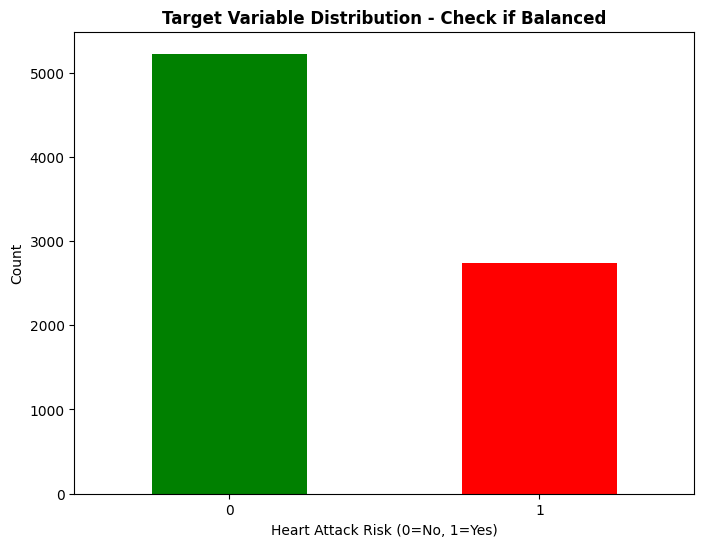

In [22]:

target_col = 'heart_attack_risk'

print(f"{target_col} distribution:")
print(train_df[target_col].value_counts())

print("\nPercentage:")
print(train_df[target_col].value_counts(normalize=True) * 100)

# Visualize
plt.figure(figsize=(8, 6))
train_df[target_col].value_counts().plot(kind='bar', color=['green', 'red'])
plt.title('Target Variable Distribution - Check if Balanced', fontweight='bold')
plt.xlabel('Heart Attack Risk (0=No, 1=Yes)')
plt.ylabel('Count')
plt.xticks(rotation=0)
plt.show()

# Check balance
dist = train_df[target_col].value_counts(normalize=True) * 100
if dist.min() < 40:
    print("\nWARNING: Data is IMBALANCED - will use SMOTE later")
else:
    print("\nData is BALANCED - no SMOTE needed")

<Figure size 1000x500 with 0 Axes>

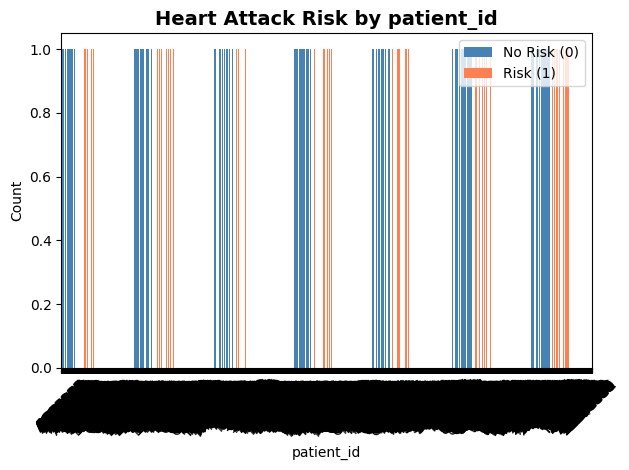

<Figure size 1000x500 with 0 Axes>

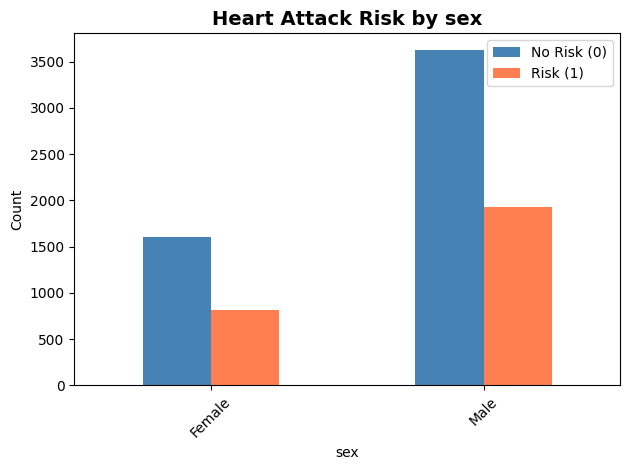

<Figure size 1000x500 with 0 Axes>

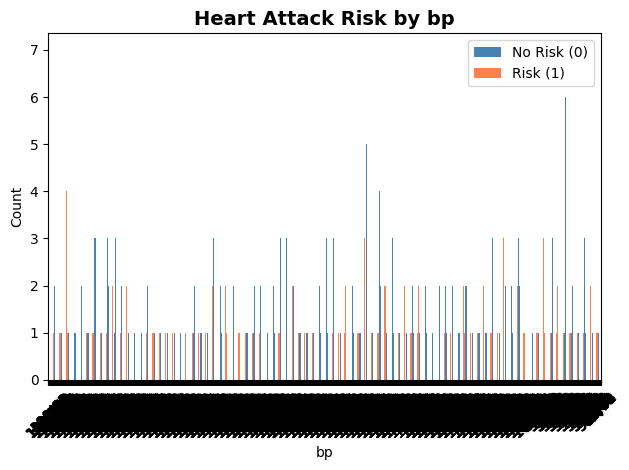

<Figure size 1000x500 with 0 Axes>

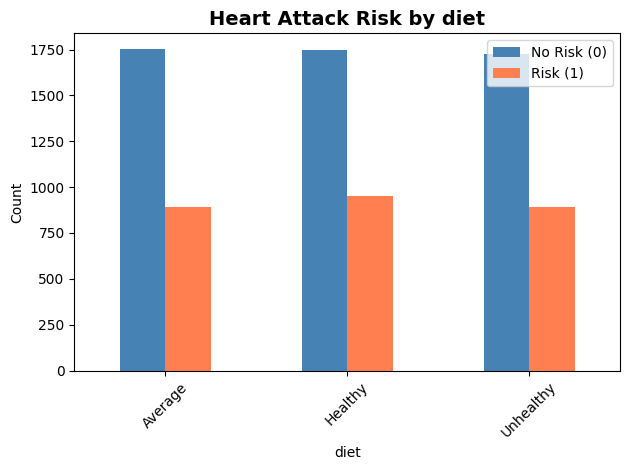

<Figure size 1000x500 with 0 Axes>

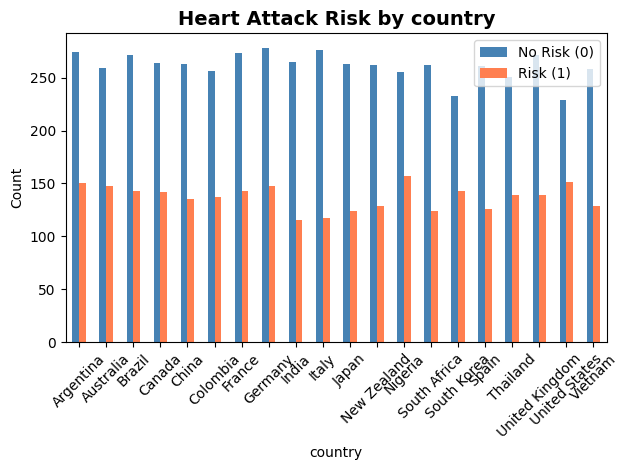

<Figure size 1000x500 with 0 Axes>

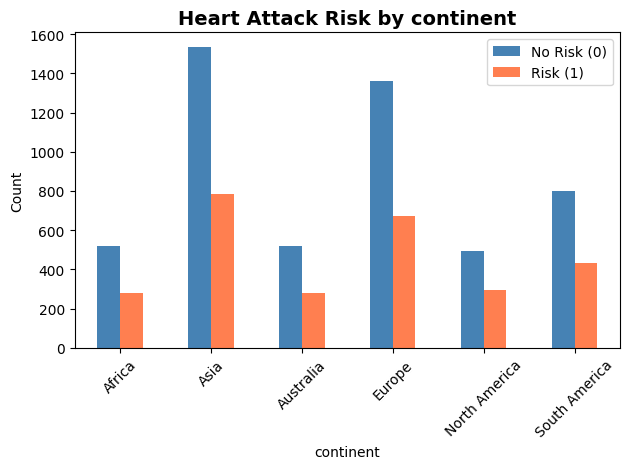

<Figure size 1000x500 with 0 Axes>

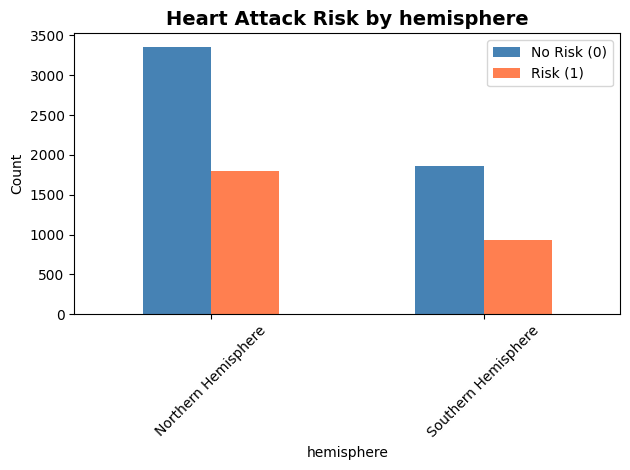

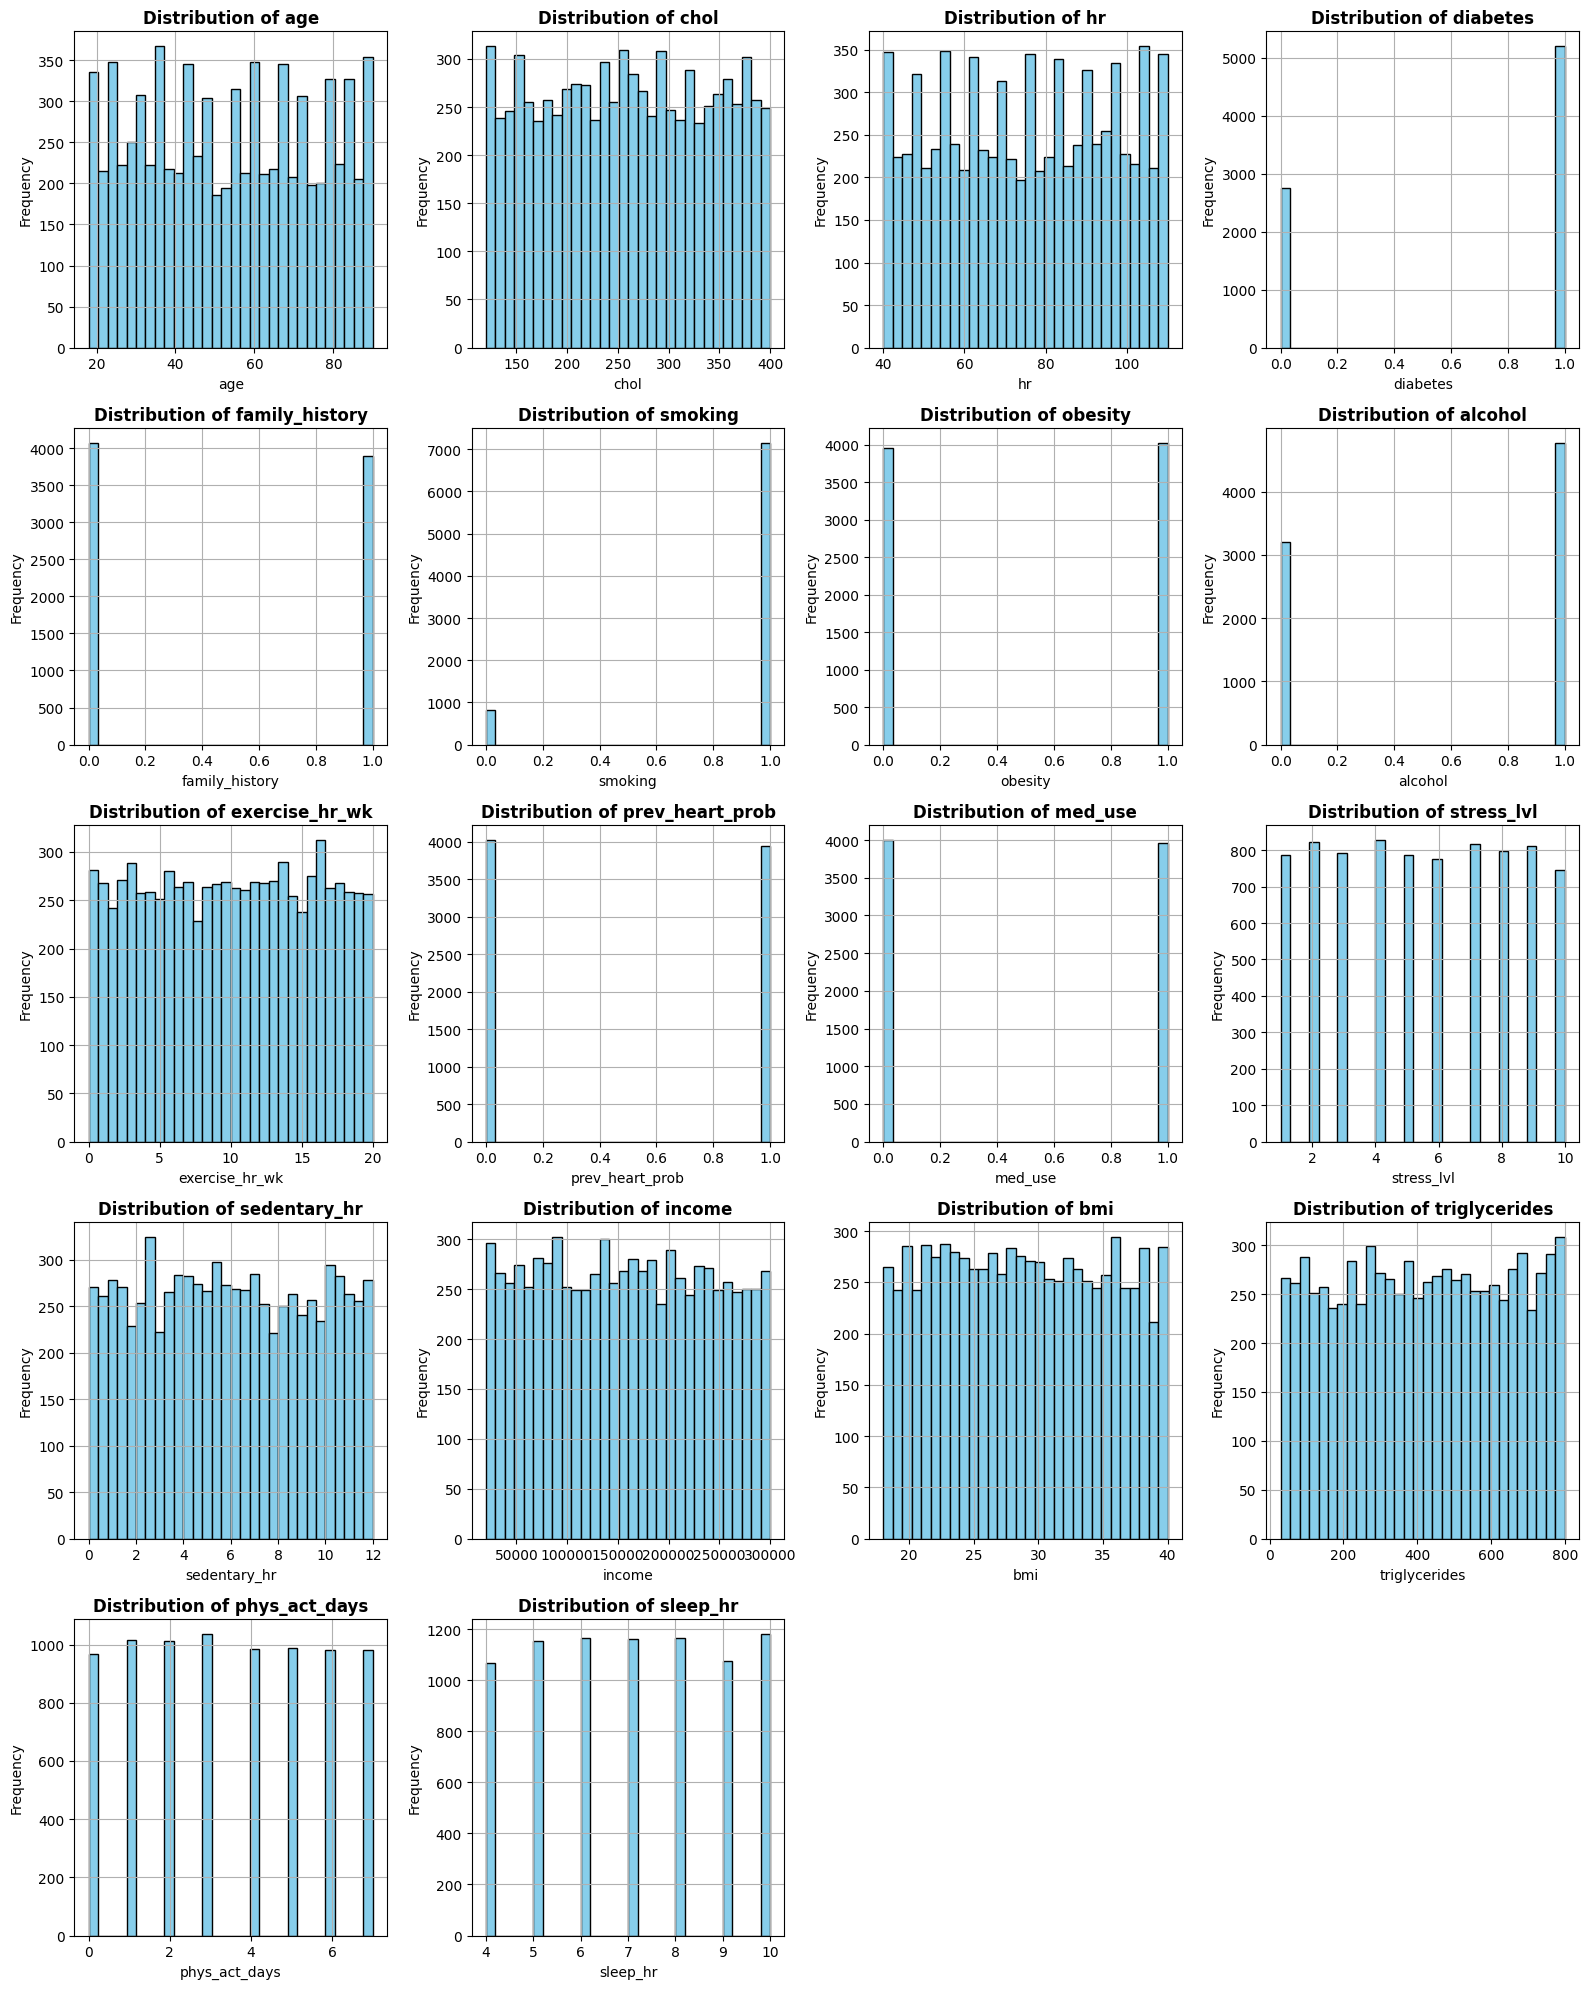


CORRELATION WITH TARGET VARIABLE
triglycerides      0.016049
income             0.015674
chol               0.015665
diabetes           0.012428
exercise_hr_wk     0.010550
age                0.009327
smoking            0.003843
med_use            0.001844
bmi                0.001349
stress_lvl        -0.000650
prev_heart_prob   -0.000665
hr                -0.002077
family_history    -0.003767
phys_act_days     -0.004242
sedentary_hr      -0.009421
obesity           -0.010058
sleep_hr          -0.016793
alcohol           -0.017049
Name: heart_attack_risk, dtype: float64


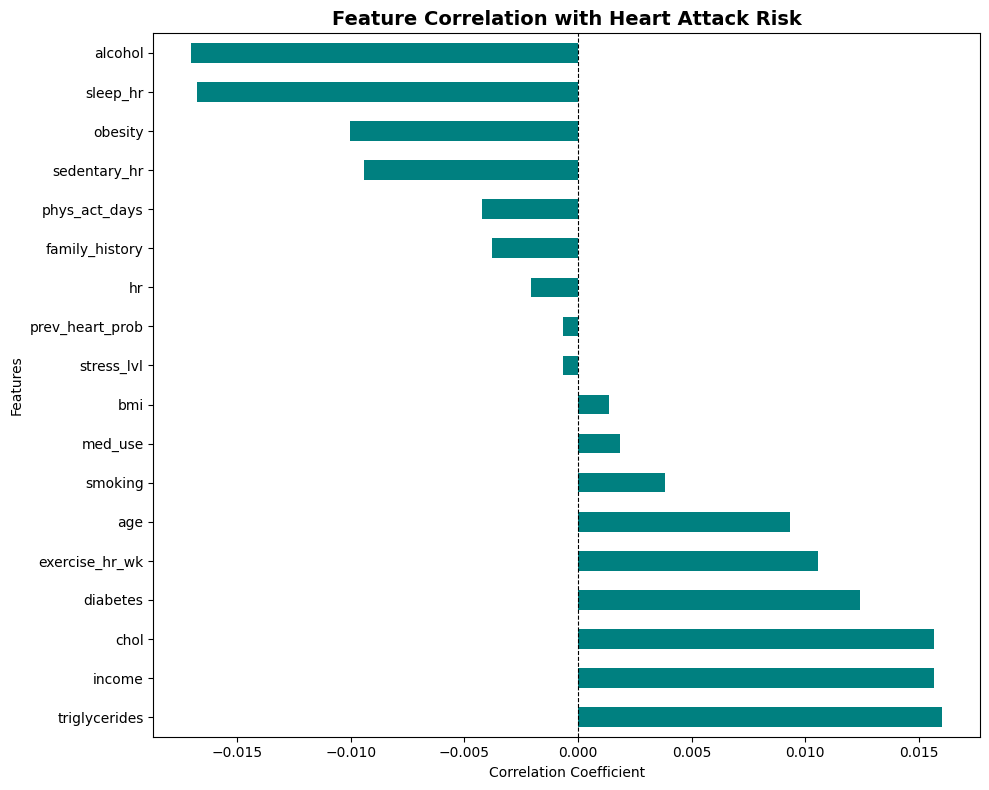


✅ Additional EDA completed!


In [23]:
import matplotlib.pyplot as plt
import seaborn as sns



# 1. TARGET VARIABLE vs CATEGORICAL FEATURES
categorical_cols = train_df.select_dtypes(include=['object']).columns.tolist()

if len(categorical_cols) > 0:
    for col in categorical_cols:
        plt.figure(figsize=(10, 5))

        # Count plot showing target distribution within each category
        pd.crosstab(train_df[col], train_df['heart_attack_risk']).plot(kind='bar',
                                                                         stacked=False,
                                                                         color=['steelblue', 'coral'])
        plt.title(f'Heart Attack Risk by {col}', fontweight='bold', fontsize=14)
        plt.xlabel(col)
        plt.ylabel('Count')
        plt.legend(['No Risk (0)', 'Risk (1)'])
        plt.xticks(rotation=45)
        plt.tight_layout()
        plt.show()

# 2. DISTRIBUTION OF NUMERICAL FEATURES (Histograms)
numerical_cols = train_df.select_dtypes(include=['int64', 'float64']).columns.tolist()
# Remove patient_id and target
numerical_cols = [col for col in numerical_cols if col not in ['patient_id', 'heart_attack_risk']]

if len(numerical_cols) > 0:
    num_cols_plot = len(numerical_cols)
    num_rows = (num_cols_plot // 4) + 1

    fig, axes = plt.subplots(nrows=num_rows, ncols=4, figsize=(16, 4*num_rows))
    axes = axes.flatten()

    for idx, col in enumerate(numerical_cols):
        train_df[col].hist(bins=30, ax=axes[idx], color='skyblue', edgecolor='black')
        axes[idx].set_title(f'Distribution of {col}', fontweight='bold')
        axes[idx].set_xlabel(col)
        axes[idx].set_ylabel('Frequency')

    # Hide extra subplots
    for idx in range(len(numerical_cols), len(axes)):
        axes[idx].axis('off')

    plt.tight_layout()
    plt.show()

# 3. CORRELATION WITH TARGET VARIABLE
print("\n" + "="*70)
print("CORRELATION WITH TARGET VARIABLE")
print("="*70)

# Calculate correlation with target
correlations = train_df[numerical_cols + ['heart_attack_risk']].corr()['heart_attack_risk'].drop('heart_attack_risk')
correlations = correlations.sort_values(ascending=False)

print(correlations)

# Visualize
plt.figure(figsize=(10, 8))
correlations.plot(kind='barh', color='teal')
plt.title('Feature Correlation with Heart Attack Risk', fontweight='bold', fontsize=14)
plt.xlabel('Correlation Coefficient')
plt.ylabel('Features')
plt.axvline(x=0, color='black', linestyle='--', linewidth=0.8)
plt.tight_layout()
plt.show()


'''
top_features = correlations.abs().nlargest(5).index.tolist()
top_features.append('heart_attack_risk')

print(f"\nCreating pairplot for top {len(top_features)-1} correlated features...")
sns.pairplot(train_df[top_features], hue='heart_attack_risk', palette='Set1')
plt.show()
'''

print("\n✅ Additional EDA completed!")

In [24]:

# Save test IDs for submission
test_ids = test_df['patient_id'].copy()

# Drop patient_id from both
columns_to_drop = ['patient_id']
train_df = train_df.drop(columns=columns_to_drop, errors='ignore')
test_df = test_df.drop(columns=columns_to_drop, errors='ignore')

print(f"Columns dropped: {columns_to_drop}")
print(f"Train shape: {train_df.shape}")
print(f"Test shape: {test_df.shape}")

Columns dropped: ['patient_id']
Train shape: (7963, 25)
Test shape: (800, 24)


In [26]:
from sklearn.preprocessing import LabelEncoder



# Separate features and target
X_full = train_df.drop(columns=['heart_attack_risk'])
y_full = train_df['heart_attack_risk']

# Get categorical columns
categorical_cols = X_full.select_dtypes(include=['object']).columns.tolist()
print(f"Categorical columns: {categorical_cols}")

# Label Encoding - HANDLE UNSEEN CATEGORIES
le_dict = {}  # Store encoders for each column

for col in categorical_cols:
    le = LabelEncoder()

    # Fit on BOTH train and test combined to avoid unseen categories
    combined_values = pd.concat([X_full[col], test_df[col]]).astype(str)
    le.fit(combined_values)

    # Transform both
    X_full[col] = le.transform(X_full[col].astype(str))
    test_df[col] = le.transform(test_df[col].astype(str))

    le_dict[col] = le  # Save encoder

    print(f"  {col}: {len(le.classes_)} unique values")

print("\n✅ Encoding completed!")
print(f"X_full shape: {X_full.shape}")
print(f"test_df shape: {test_df.shape}")



Categorical columns: ['sex', 'bp', 'diet', 'country', 'continent', 'hemisphere']
  sex: 4 unique values
  bp: 3915 unique values
  diet: 3 unique values
  country: 20 unique values
  continent: 6 unique values
  hemisphere: 2 unique values

✅ Encoding completed!
X_full shape: (7963, 24)
test_df shape: (800, 24)


In [27]:
from sklearn.model_selection import train_test_split



X_train, X_val, y_train, y_val = train_test_split(
    X_full, y_full,
    test_size=0.2,  # 20% for validation
    random_state=42,
    stratify=y_full  # Maintains class distribution
)

print(f"Training set: {X_train.shape}")
print(f"Validation set: {X_val.shape}")
print(f"Training labels distribution:")
print(pd.Series(y_train).value_counts())

Training set: (6370, 24)
Validation set: (1593, 24)
Training labels distribution:
heart_attack_risk
0    4179
1    2191
Name: count, dtype: int64


In [28]:
from imblearn.over_sampling import SMOTE

# Check if imbalanced
class_dist = pd.Series(y_train).value_counts(normalize=True) * 100
print(f"Class distribution: \n{class_dist}")

if class_dist.min() < 40:
    print("\nData is IMBALANCED - Applying SMOTE...")
    smote = SMOTE(random_state=42)
    X_train, y_train = smote.fit_resample(X_train, y_train)
    print(f"After SMOTE: {X_train.shape}")
    print(f"New distribution:\n{pd.Series(y_train).value_counts()}")
else:
    print("\nData is balanced - no SMOTE needed")

Class distribution: 
heart_attack_risk
0    65.604396
1    34.395604
Name: proportion, dtype: float64

Data is IMBALANCED - Applying SMOTE...
After SMOTE: (8358, 24)
New distribution:
heart_attack_risk
0    4179
1    4179
Name: count, dtype: int64


In [29]:
from sklearn.preprocessing import RobustScaler
scaler = RobustScaler()


X_train_scaled = scaler.fit_transform(X_train)
X_val_scaled = scaler.transform(X_val)

print("Scaling completed!")
print("Training: fit_transform")
print("Validation: transform only")

Scaling completed!
Training: fit_transform
Validation: transform only


In [31]:
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score

print("="*70)
print("TRAINING MULTIPLE MODELS")
print("="*70)

models = {
    'Logistic Regression': LogisticRegression(random_state=42, max_iter=1000),
    'Decision Tree': DecisionTreeClassifier(random_state=42),
    'Random Forest': RandomForestClassifier(random_state=42, n_estimators=100),
    'Gradient Boosting': GradientBoostingClassifier(random_state=42),
    'KNN': KNeighborsClassifier(),
    'Naive Bayes': GaussianNB()
}

results = {}

for name, model in models.items():
    print(f"\n{'='*70}")
    print(f"Training: {name}")
    print(f"{'='*70}")

    model.fit(X_train_scaled, y_train)
    y_pred = model.predict(X_val_scaled)

    accuracy = accuracy_score(y_val, y_pred)
    precision = precision_score(y_val, y_pred)
    recall = recall_score(y_val, y_pred)
    f1 = f1_score(y_val, y_pred)

    if hasattr(model, "predict_proba"):
        y_pred_proba = model.predict_proba(X_val_scaled)[:, 1]
        roc_auc = roc_auc_score(y_val, y_pred_proba)
    else:
        roc_auc = 0.0

    results[name] = {
        'Accuracy': accuracy,
        'Precision': precision,
        'Recall': recall,
        'F1-Score': f1,
        'ROC-AUC': roc_auc
    }

    print(f"Accuracy:  {accuracy:.4f}")
    print(f"Precision: {precision:.4f}")
    print(f"Recall:    {recall:.4f} <- COMPETITION METRIC")
    print(f"F1-Score:  {f1:.4f}")
    print(f"ROC-AUC:   {roc_auc:.4f}")

# Summary
results_df = pd.DataFrame(results).T
print("\n" + "="*70)
print("MODEL COMPARISON")
print("="*70)
print(results_df)

best_model_name = results_df['Recall'].idxmax()
print(f"\nBEST MODEL (Highest Recall): {best_model_name}")
print(f"Validation Recall: {results_df.loc[best_model_name, 'Recall']:.4f}")

TRAINING MULTIPLE MODELS

Training: Logistic Regression
Accuracy:  0.5549
Precision: 0.3565
Recall:    0.3650 <- COMPETITION METRIC
F1-Score:  0.3607
ROC-AUC:   0.5127

Training: Decision Tree
Accuracy:  0.5016
Precision: 0.3170
Recall:    0.3887 <- COMPETITION METRIC
F1-Score:  0.3492
ROC-AUC:   0.4747

Training: Random Forest
Accuracy:  0.5970
Precision: 0.3576
Recall:    0.2153 <- COMPETITION METRIC
F1-Score:  0.2688
ROC-AUC:   0.4897

Training: Gradient Boosting
Accuracy:  0.5599
Precision: 0.3461
Recall:    0.3139 <- COMPETITION METRIC
F1-Score:  0.3292
ROC-AUC:   0.5066

Training: KNN
Accuracy:  0.5060
Precision: 0.3438
Recall:    0.4799 <- COMPETITION METRIC
F1-Score:  0.4006
ROC-AUC:   0.5015

Training: Naive Bayes
Accuracy:  0.5480
Precision: 0.3300
Recall:    0.3047 <- COMPETITION METRIC
F1-Score:  0.3169
ROC-AUC:   0.5054

MODEL COMPARISON
                     Accuracy  Precision    Recall  F1-Score   ROC-AUC
Logistic Regression  0.554928   0.356506  0.364964  0.360685  0.51

In [32]:
from sklearn.model_selection import GridSearchCV

print("HYPERPARAMETER TUNING FOR KNN")

param_grid = {
    'n_neighbors': [3, 5, 7, 9, 11, 15],
    'weights': ['uniform', 'distance'],
    'metric': ['euclidean', 'manhattan']
}

knn = KNeighborsClassifier()
grid_search = GridSearchCV(knn, param_grid, cv=5, scoring='recall', n_jobs=-1)
grid_search.fit(X_train_scaled, y_train)

print(f"Best parameters: {grid_search.best_params_}")
print(f"Best recall: {grid_search.best_score_:.4f}")

# Use best model
best_knn = grid_search.best_estimator_
y_pred = best_knn.predict(X_val_scaled)
recall = recall_score(y_val, y_pred)
print(f"Validation recall: {recall:.4f}")

HYPERPARAMETER TUNING FOR KNN
Best parameters: {'metric': 'euclidean', 'n_neighbors': 3, 'weights': 'distance'}
Best recall: 0.8002
Validation recall: 0.4945


In [33]:
from sklearn.ensemble import VotingClassifier

# Ensemble of top 3 models
voting_clf = VotingClassifier(
    estimators=[
        ('knn', KNeighborsClassifier(n_neighbors=3, weights='distance', metric='euclidean')),
        ('lr', LogisticRegression(random_state=42, max_iter=1000, class_weight='balanced')),
        ('dt', DecisionTreeClassifier(random_state=42, max_depth=10, class_weight='balanced'))
    ],
    voting='soft'
)

voting_clf.fit(X_train_scaled, y_train)
y_pred = voting_clf.predict(X_val_scaled)
recall = recall_score(y_val, y_pred)
print(f"Ensemble Recall: {recall:.4f}")

Ensemble Recall: 0.4124


In [34]:

final_model = KNeighborsClassifier(n_neighbors=3, weights='distance', metric='euclidean')

# Retrain on 100% of training data
scaler_final = RobustScaler()
X_full_scaled = scaler_final.fit_transform(X_full)

final_model.fit(X_full_scaled, y_full)

print(f"Model trained on: {X_full.shape[0]} samples")
print(f"Model: KNN (n_neighbors=3, weights=distance)")


Model trained on: 7963 samples
Model: KNN (n_neighbors=3, weights=distance)


In [36]:

print("PREPARING TEST DATA & MAKING PREDICTIONS")


# Scale test data using the same scaler
test_scaled = scaler_final.transform(test_df)

# Make predictions on competition test set
competition_predictions = final_model.predict(test_scaled)

print(f"Predictions made: {len(competition_predictions)}")
print(f"\nPrediction distribution:")
print(pd.Series(competition_predictions).value_counts())
print(f"\nPercentage:")
print(pd.Series(competition_predictions).value_counts(normalize=True) * 100)

PREPARING TEST DATA & MAKING PREDICTIONS
Predictions made: 800

Prediction distribution:
0    586
1    214
Name: count, dtype: int64

Percentage:
0    73.25
1    26.75
Name: proportion, dtype: float64


In [38]:

print("CREATING SUBMISSION FILE")


# Create submission dataframe
submission = pd.DataFrame({
    'patient_id': test_ids,
    'heart_attack_risk': competition_predictions
})

# Verify format
print("Submission format check:")
print(f"Columns: {list(submission.columns)}")
print(f"Shape: {submission.shape}")
print(f"\nFirst 10 rows:")
print(submission.head(10))

# Check for any issues
print(f"\nMissing values: {submission.isnull().sum().sum()}")
print(f"Duplicate patient_ids: {submission['patient_id'].duplicated().sum()}")

# Save CSV
filename = 'EM25_Aurora_Task1_Predictions.csv'
submission.to_csv(filename, index=False)

print(f"\n✓ File saved: {filename}")

CREATING SUBMISSION FILE
Submission format check:
Columns: ['patient_id', 'heart_attack_risk']
Shape: (800, 2)

First 10 rows:
  patient_id  heart_attack_risk
0    VRK5064                  0
1    NEN2365                  0
2    KXT2493                  0
3    TKO0406                  0
4    GDP2405                  1
5    GRQ8132                  0
6    KUL5067                  0
7    OTZ1268                  0
8    EZN4283                  0
9    HVE8034                  0

Missing values: 0
Duplicate patient_ids: 0

✓ File saved: EM25_Aurora_Task1_Predictions.csv


In [39]:
from google.colab import files
import pandas as pd



# Your best tuned model
final_model = KNeighborsClassifier(n_neighbors=3, weights='distance', metric='euclidean')

# Retrain on full data
scaler_final = RobustScaler()
X_full_scaled = scaler_final.fit_transform(X_full)
test_scaled = scaler_final.transform(test_df)

final_model.fit(X_full_scaled, y_full)

# Predict
competition_predictions = final_model.predict(test_scaled)

# Create submission
submission = pd.DataFrame({
    'patient_id': test_ids,
    'heart_attack_risk': competition_predictions
})

submission.to_csv('EM25_Aurora_Task1_Predictions.csv', index=False)
print("Predictions CSV created!")
print(submission.head())

# Download
files.download('EM25_Aurora_Task1_Predictions.csv')

Predictions CSV created!
  patient_id  heart_attack_risk
0    VRK5064                  0
1    NEN2365                  0
2    KXT2493                  0
3    TKO0406                  0
4    GDP2405                  1


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

FINAL METRICS FOR SUBMISSION
Model: KNN (n_neighbors=3, weights=distance)
Accuracy:  0.5060
Precision: 0.3438
Recall:    0.4945
F1-Score:  0.4006
ROC-AUC:   0.5015


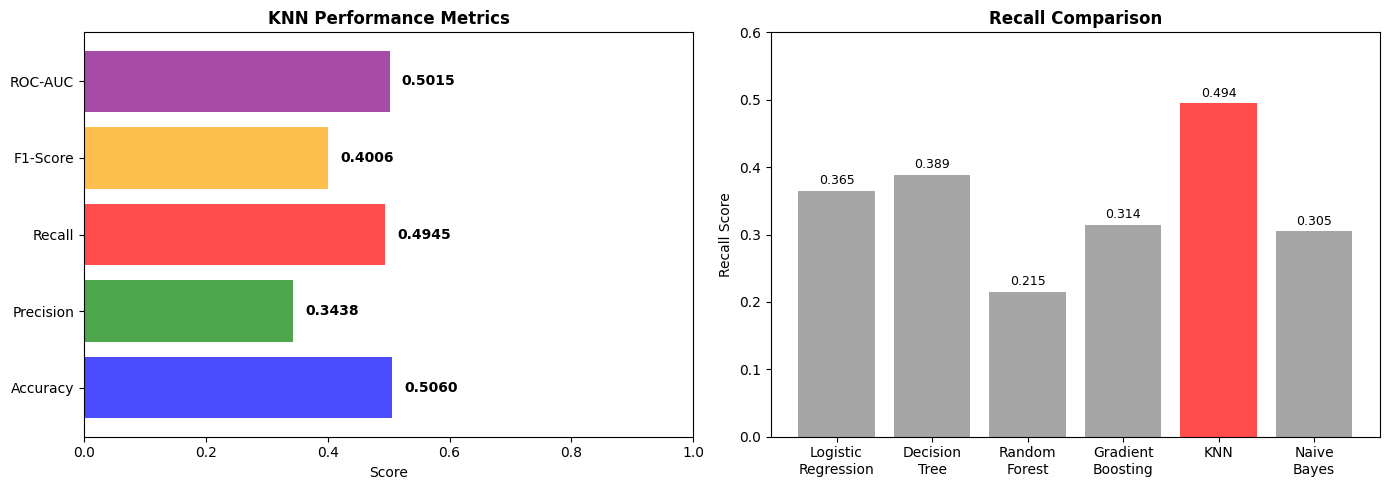

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

Metrics screenshot downloaded!


In [40]:
import matplotlib.pyplot as plt

print("="*70)
print("FINAL METRICS FOR SUBMISSION")
print("="*70)
print("Model: KNN (n_neighbors=3, weights=distance)")
print("Accuracy:  0.5060")
print("Precision: 0.3438")
print("Recall:    0.4945")
print("F1-Score:  0.4006")
print("ROC-AUC:   0.5015")
print("="*70)

# Create visualization
fig, axes = plt.subplots(1, 2, figsize=(14, 5))

# Metrics
metrics = ['Accuracy', 'Precision', 'Recall', 'F1-Score', 'ROC-AUC']
values = [0.5060, 0.3438, 0.4945, 0.4006, 0.5015]
colors = ['blue', 'green', 'red', 'orange', 'purple']

axes[0].barh(metrics, values, color=colors, alpha=0.7)
axes[0].set_xlabel('Score')
axes[0].set_title('KNN Performance Metrics', fontweight='bold')
axes[0].set_xlim([0, 1])

for i, v in enumerate(values):
    axes[0].text(v + 0.02, i, f'{v:.4f}', va='center', fontweight='bold')

# Model comparison
models = ['Logistic\nRegression', 'Decision\nTree', 'Random\nForest',
          'Gradient\nBoosting', 'KNN', 'Naive\nBayes']
recalls = [0.3650, 0.3887, 0.2153, 0.3139, 0.4945, 0.3047]

bars = axes[1].bar(models, recalls, color=['gray']*4 + ['red'] + ['gray'], alpha=0.7)
axes[1].set_ylabel('Recall Score')
axes[1].set_title('Recall Comparison', fontweight='bold')
axes[1].set_ylim([0, 0.6])

for i, v in enumerate(recalls):
    axes[1].text(i, v + 0.01, f'{v:.3f}', ha='center', fontsize=9)

plt.tight_layout()
plt.savefig('EM25_Aurora_Task1_Metrics.png', dpi=300, bbox_inches='tight')
plt.show()

files.download('EM25_Aurora_Task1_Metrics.png')
print("Metrics screenshot downloaded!")